#**Customer Analytics Project Report**
**Objective**

To analyze customer purchasing behavior, identify valuable segments, and generate actionable business insights from the dataset.

## Dataset Description
- Dataset: `customer_details.csv`
- Records: 3,900
- Columns: 18 (customer info, purchase details, reviews, etc.)
- Tools used: Python (pandas, seaborn, matplotlib)




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/customer_details.csv')
customer_data = pd.DataFrame(data)
customer_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Data Cleaning

- Checked for nulls and missing values
- Standardized text columns (e.g., gender, category, etc.)
- Cleaned categorical variables and removed leading/trailing spaces



In [ ]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
print(customer_data.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [ ]:
print(customer_data.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [3]:
cat_cols = customer_data.select_dtypes(include='object').columns
cat_cols

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [4]:
# # Check unique values
import pandas as pd
def get_unique_values(df, columns):
    for col in columns:
        if col in df.columns:
            print(f"Unique values in '{col}':")
            for val in df[col].unique():
                print(f"  {val}")
            print("-" * 30)
        else:
            print(f"Column '{col}' not found in DataFrame.")
            print("-" * 30)
unique_values = get_unique_values(customer_data, cat_cols)
print(unique_values)

Unique values in 'Gender':
  Male
  Female
------------------------------
Unique values in 'Item Purchased':
  Blouse
  Sweater
  Jeans
  Sandals
  Sneakers
  Shirt
  Shorts
  Coat
  Handbag
  Shoes
  Dress
  Skirt
  Sunglasses
  Pants
  Jacket
  Hoodie
  Jewelry
  T-shirt
  Scarf
  Hat
  Socks
  Backpack
  Belt
  Boots
  Gloves
------------------------------
Unique values in 'Category':
  Clothing
  Footwear
  Outerwear
  Accessories
------------------------------
Unique values in 'Location':
  Kentucky
  Maine
  Massachusetts
  Rhode Island
  Oregon
  Wyoming
  Montana
  Louisiana
  West Virginia
  Missouri
  Arkansas
  Hawaii
  Delaware
  New Hampshire
  New York
  Alabama
  Mississippi
  North Carolina
  California
  Oklahoma
  Florida
  Texas
  Nevada
  Kansas
  Colorado
  North Dakota
  Illinois
  Indiana
  Arizona
  Alaska
  Tennessee
  Ohio
  New Jersey
  Maryland
  Vermont
  New Mexico
  South Carolina
  Idaho
  Pennsylvania
  Connecticut
  Utah
  Virginia
  Georgia
  Nebraska

In [5]:
# Check ranges
print(customer_data['Age'].describe())
print(customer_data['Purchase Amount (USD)'].describe())

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64


In [6]:
def clean_categorical_columns(df, columns):
    """
    Strips whitespace, fixes casing, and ensures consistency in all given categorical columns.

    Parameters:
    df (pd.DataFrame): Your data
    columns (list): List of column names to clean

    Returns:
    pd.DataFrame: DataFrame with cleaned categorical columns
    """
    for col in columns:
        df[col] = df[col].astype(str).str.strip().str.title()
    return df


In [7]:
clean_categorical_columns(customer_data, cat_cols)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,Paypal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,Paypal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [8]:
customer_data_cleaned = customer_data.copy()
customer_data_cleaned.columns = customer_data_cleaned.columns.str.lower().str.replace(" ", "_")
customer_data_cleaned

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,Paypal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,Paypal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


##**EDA**

**Gender Distribution**



Text(0.5, 1.0, 'Gender Distribution of Customers')

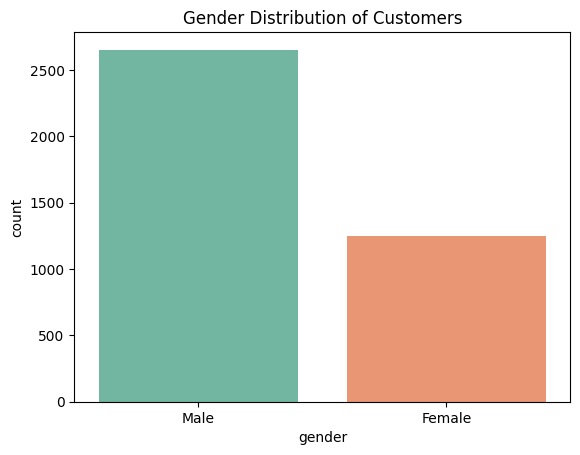

In [ ]:
sns.countplot(data=customer_data_cleaned, x='gender', hue='gender', palette='Set2', legend=False)
plt.title('Gender Distribution of Customers')

**Insight:** The majority of customers are male

**Age Distribution**

Text(0.5, 1.0, 'Age Distribution')

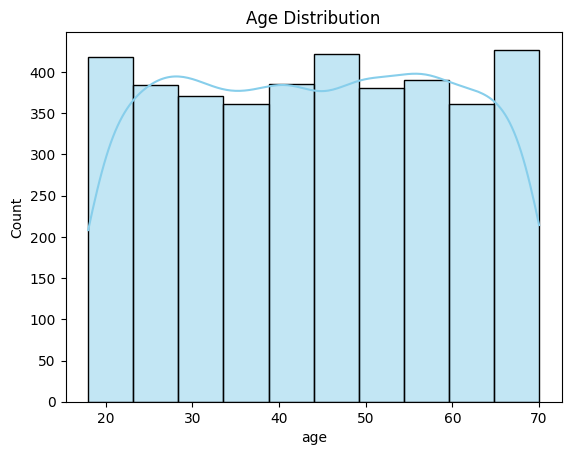

In [ ]:
sns.histplot(customer_data_cleaned['age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')

**Insight:**  The age distribution shows three strong clusters — 15–25, 45–55, and 55–70 — with similar customer counts.



**Purchase Amount Distribution**



Text(0.5, 1.0, 'Distribution of Purchase Amounts')

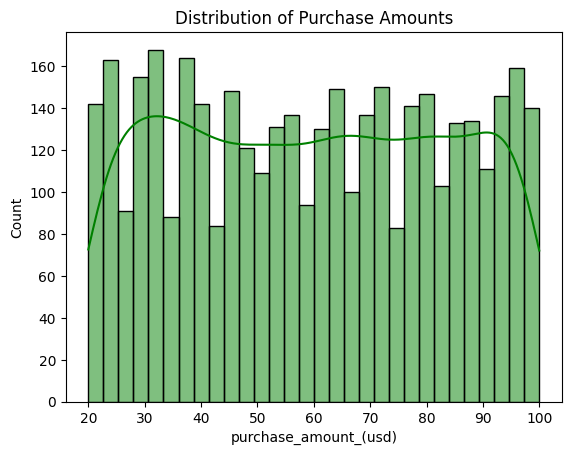

In [ ]:
sns.histplot(customer_data_cleaned['purchase_amount_(usd)'], bins=30, kde=True, color='green')
plt.title('Distribution of Purchase Amounts')

**Insight:** The distribution of purchase amounts is relatively uniform, ranging between 20 and 100 dollar, with no strong skew toward low or high values.



**Review Rating Distribution**



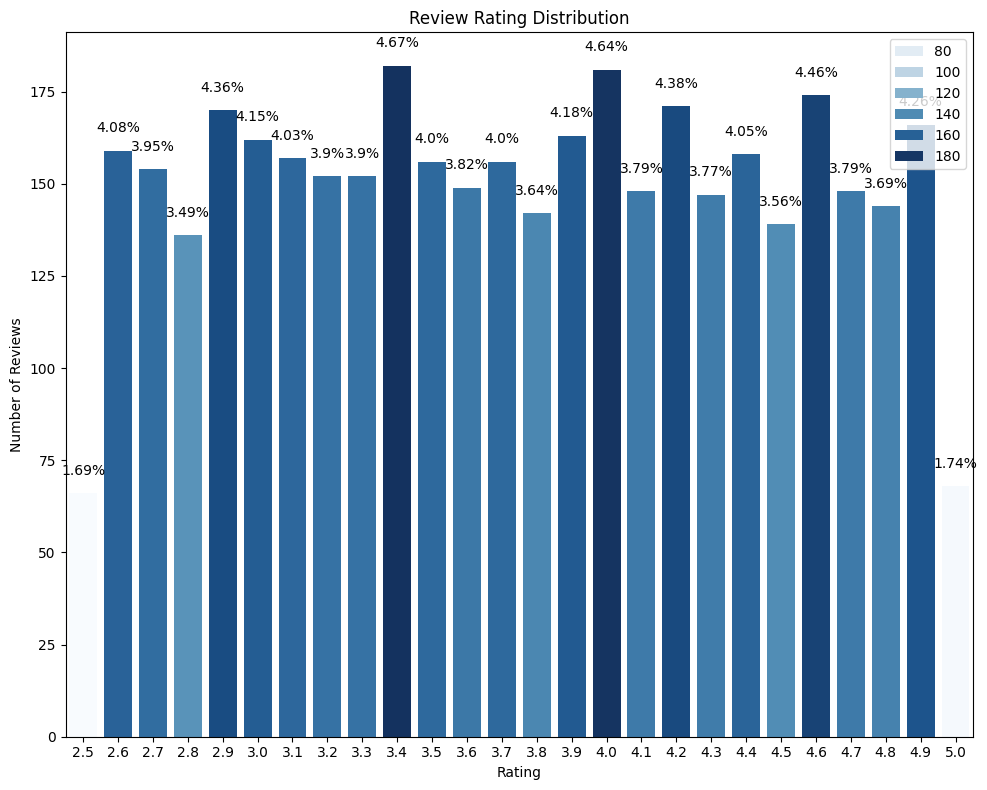

In [ ]:
rating_counts = customer_data_cleaned['review_rating'].value_counts().sort_index()
rating_pct = (rating_counts / rating_counts.sum() * 100).round(2)

plt.figure(figsize=(10, 8))
sns.barplot(x=rating_counts.index, y=rating_counts.values,hue = rating_counts.values, palette='Blues')

for i, val in enumerate(rating_counts.values):
    plt.text(i, val + 5, f'{rating_pct.values[i]}%', ha='center', fontsize=10)

plt.title('Review Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


**Insight:**  
The majority of customer reviews fall between **3.4 and 4,6**, with the highest peaks at **3.4 and 4,0**. This suggests moderate customer satisfaction.


**Top Items Purchased**



Text(0.5, 1.0, 'Top 10 Purchased Items')

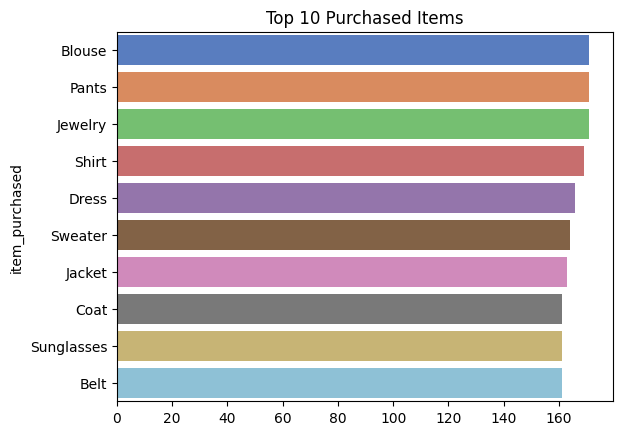

In [53]:
top_items = customer_data_cleaned['item_purchased'].value_counts().head(10)
sns.barplot(x=top_items.values, y=top_items.index, hue=top_items.index, palette='muted')
plt.savefig("images/top_items_purchased.png", bbox_inches='tight', dpi=300)
plt.title('Top 10 Purchased Items')

**Insight**: The most in-demand items are blouses, pants, jewelry, and shirts, which consistently lead in purchase counts. Several other products follow closely, showing a diverse spread of customer preferences beyond the top 4.



**Category Distribution**



Text(0.5, 1.0, 'Top Product Categories')

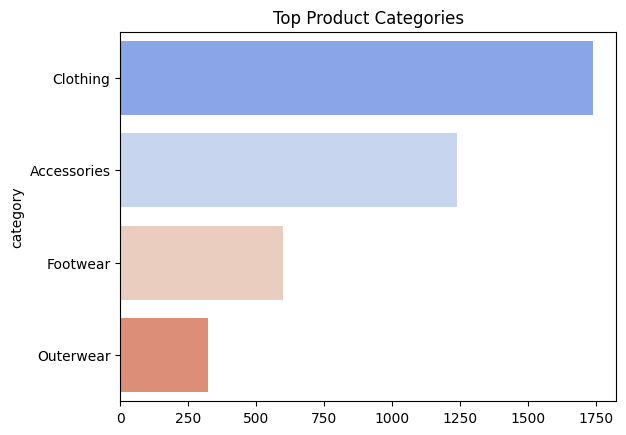

In [55]:
top_categories = customer_data_cleaned['category'].value_counts()
sns.barplot(x=top_categories.values[:10], y=top_categories.index, hue =top_categories.index, palette='coolwarm')
plt.savefig("images/top_categories.png", bbox_inches='tight', dpi=300)
plt.title('Top Product Categories')

In [41]:
category_revenue = customer_data_cleaned.groupby('category')['purchase_amount_(usd)'].sum().sort_values(ascending=False).head(10)
print(category_revenue)

category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: purchase_amount_(usd), dtype: int64


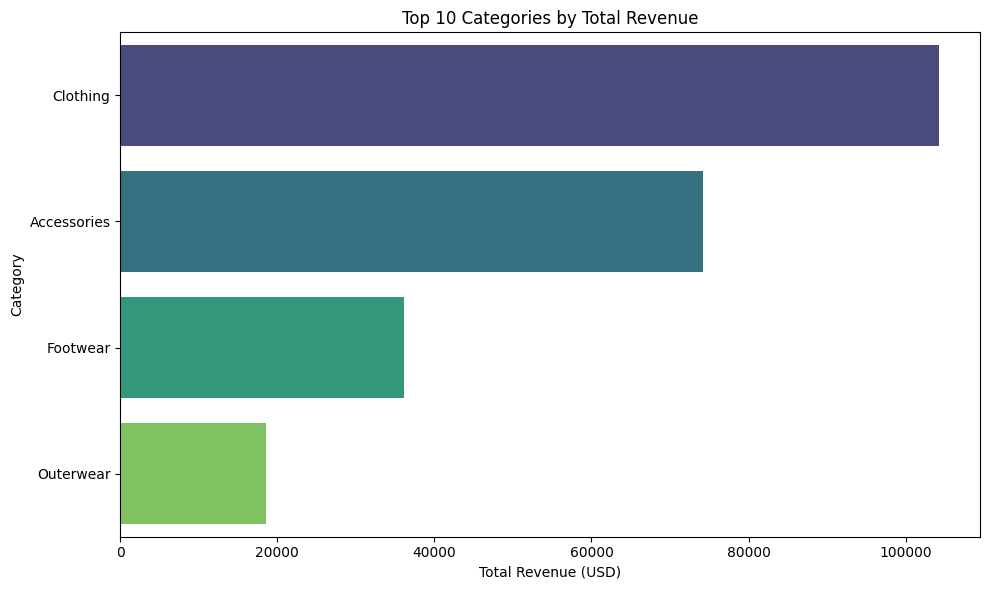

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, hue= category_revenue.index, palette='viridis')
plt.title('Top 10 Categories by Total Revenue')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

**Insight:** The Clothing category dominates customer purchases, indicating it is the core product line in the catalog.
It not only leads in purchase volume but also generates the highest total revenue, making it the most valuable category from both demand and financial impact perspectives.

**Location Distribution**

Text(0.5, 1.0, 'Top Customer Locations')

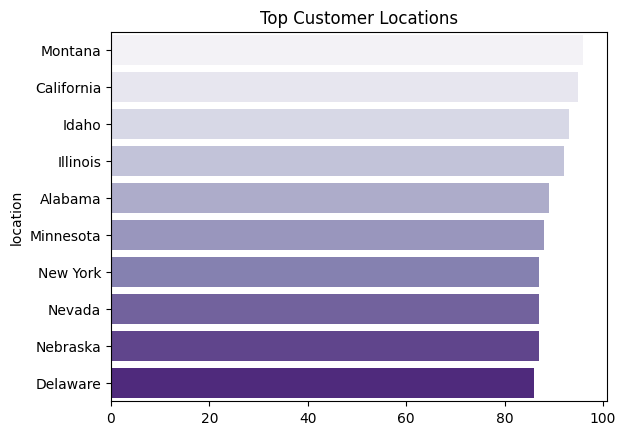

In [ ]:
top_locations = customer_data_cleaned['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, hue= top_locations.index, palette='Purples')
plt.title('Top Customer Locations')

**Insights:** Most buyers are located in Montana, California, Idaho

#**EDA Summary**

**Gender Distribution:** The majority of customers are male

**Age Distribution:** Customers are fairly evenly distributed, with strong representation in the 15–25, 45–55, and 55–70 age groups.

**Purchase Amounts:** Purchase amounts are evenly spread between 20 and 100 dollar, indicating a wide range of spending behavior across the customer base.

**Review Ratings:** Most customers give moderately high ratings, with peaks around 3.4–4.0 stars, suggesting general satisfaction.

**Top Categories:** Clothing is the leading product category, followed by Accessories, Footwear, and Outerwear, indicating diverse but fashion-focused buying behavior.

**Top Items:** The most frequently purchased items are blouses, pants, jewelry, and shirts, with several others trailing closely, reflecting a well-rounded product demand.

**Customer Locations:** Top locations are Montana, California, Idaho.

#**Segmentation by Demographics**

###**Purchase Amount by Gender**

In [47]:
mean_purchase_by_gender = customer_data_cleaned.groupby('gender')['purchase_amount_(usd)'].agg(
    Mean='mean',
    Max='max',
    Min='min')
print("Mean Purchase Amount by Gender:")
print(mean_purchase_by_gender)

Mean Purchase Amount by Gender:
             Mean  Max  Min
gender                     
Female  60.249199  100   20
Male    59.536199  100   20


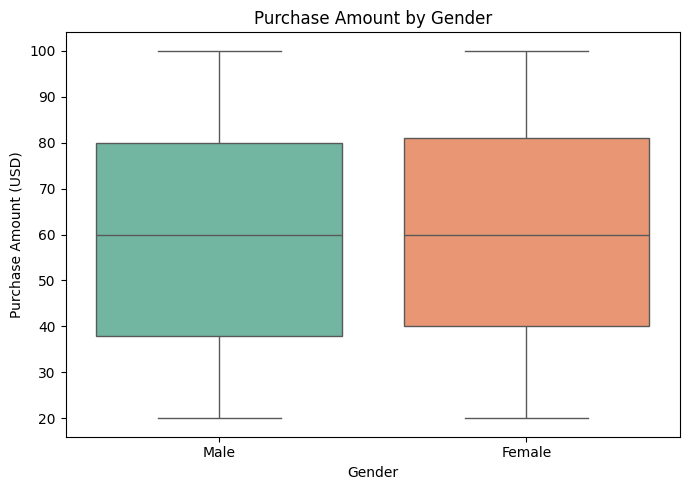

In [9]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='gender', y='purchase_amount_(usd)', hue = "gender", data=customer_data_cleaned, palette='Set2')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.tight_layout()
plt.show()


**Insights:** Average purchase amounts by gender are nearly identical, indicating balanced spending behavior across male and female segments.



###**Purchase Amount by Age Group**


In [48]:
bins = [0, 25, 35, 45, 55, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
customer_data_cleaned['age_group'] = pd.cut(customer_data_cleaned['age'], bins=bins, labels=labels, right=False)
mean_purchase_by_age = customer_data_cleaned.groupby('age_group', observed=True)['purchase_amount_(usd)'].mean().sort_index()
print("Mean Purchase Amount by Age Group:")
print(mean_purchase_by_age)

Mean Purchase Amount by Age Group:
age_group
18-25    60.201646
26-35    60.132450
36-45    59.620027
46-55    60.332447
56+      59.074703
Name: purchase_amount_(usd), dtype: float64


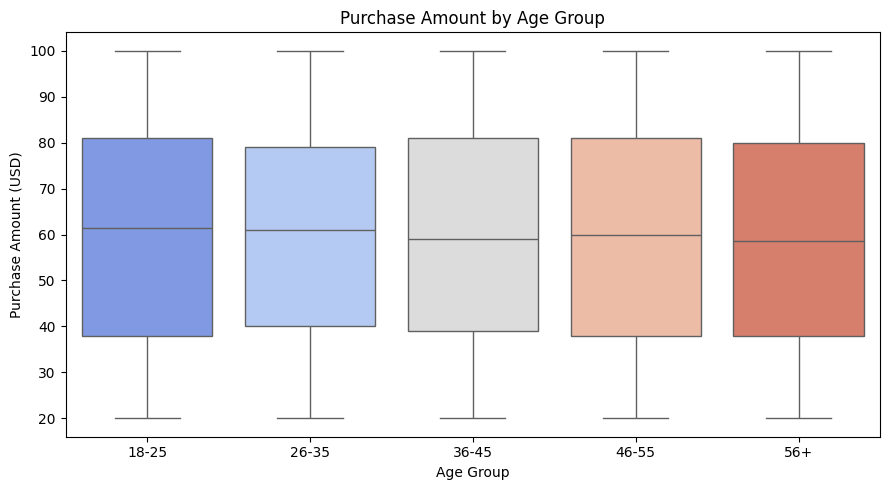

In [20]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='age_group', y='purchase_amount_(usd)', hue = "age_group", data=customer_data_cleaned, palette='coolwarm')
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount (USD)')
plt.tight_layout()
plt.show()

###**Total Revenue by Age group and gender**

In [49]:
age_gender_spend = customer_data_cleaned.groupby(['age_group', 'gender'], observed=True)['purchase_amount_(usd)'].agg(['count', 'mean', 'sum']).reset_index()
age_gender_spend.columns = ['Age Group', 'Gender', 'Purchase Count', 'Avg Purchase Amount', 'Total Revenue']
print(age_gender_spend)

  Age Group  Gender  Purchase Count  Avg Purchase Amount  Total Revenue
0     18-25  Female             152            60.394737           9180
1     18-25    Male             334            60.113772          20078
2     26-35  Female             241            62.128631          14973
3     26-35    Male             514            59.196498          30427
4     36-45  Female             232            59.258621          13748
5     36-45    Male             497            59.788732          29715
6     46-55  Female             254            58.968504          14978
7     46-55    Male             498            61.028112          30392
8       56+  Female             369            60.466125          22312
9       56+    Male             809            58.440049          47278


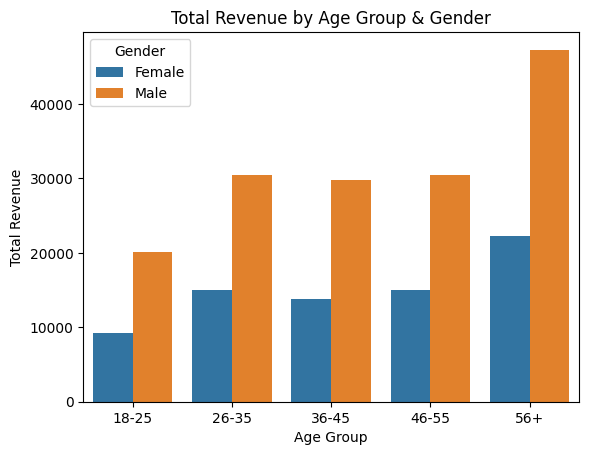

In [56]:
sns.barplot(data=age_gender_spend, x='Age Group', y='Total Revenue', hue='Gender')
plt.savefig("images/revenue_by_age_gorup_and_gender.png", bbox_inches='tight', dpi=300)
plt.title('Total Revenue by Age Group & Gender')
plt.show()

**Insights.** Average Purchase Amount is Consistent Across Age Groups
The average purchase amount ranges narrowly from 58.4 to 60.4, indicating that age is not a strong differentiator in how much customers spend per transaction.

1. **56+ Males** Lead in Total Revenue, Not Because They Spend More, But Because They Buy More Often

   They contribute 47,278 dollar in total revenue — the highest among all groups — despite having the lowest average purchase amount ($58.44).

   This shows that their value comes from volume and loyalty, not high-ticket spending.



2. **26–35 Females** Have the Highest Avg Purchase Amount

   They spend an average of $62.13 per purchase, the highest among all segments.

   However, their overall revenue is moderate due to fewer total purchases ($14,973).

3. **Male Customers** in General Show Higher Purchase Volume

  In each age group, males make significantly more purchases than females (e.g., 809 vs. 369 for 56+, 514 vs. 241 for 26–35).

  This drives their higher total revenue even when average spending is lower.

4. **46–55 Females** Spend the Least on Average

  Their average transaction is $58.97, the lowest among female groups — potentially signaling lower engagement or price sensitivity.

###**Review Rating by Gender**



In [24]:
rating_stats_by_gender = customer_data_cleaned.groupby('gender')['review_rating'].agg(['min', 'max', 'mean'])
print("Review Rating Stats by Gender:")
print(rating_stats_by_gender)

Review Rating Stats by Gender:
        min  max      mean
gender                    
Female  2.5  5.0  3.741426
Male    2.5  5.0  3.753959


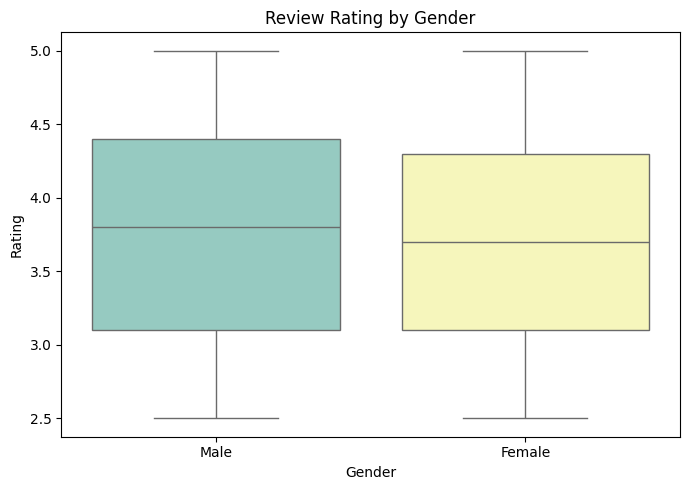

In [25]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='gender', y='review_rating', hue = 'gender', data=customer_data_cleaned, palette='Set3')
plt.title('Review Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

**Insights.** Average review ratings are consistent across genders, with no meaningful difference in satisfaction levels.

###**Frequency of Purchases by Age Group**

In [50]:
purchase_freq_by_age = customer_data_cleaned.groupby(['age_group', 'frequency_of_purchases'], observed=True).size().unstack(fill_value=0)
print("Frequency of Purchases by Age Group:")
print(purchase_freq_by_age)

Frequency of Purchases by Age Group:
frequency_of_purchases  Annually  Bi-Weekly  Every 3 Months  Fortnightly  \
age_group                                                                  
18-25                         78         76              81           68   
26-35                         92        120             117          108   
36-45                        114         86             110          103   
46-55                         92        115             107          108   
56+                          196        150             169          155   

frequency_of_purchases  Monthly  Quarterly  Weekly  
age_group                                           
18-25                        58         65      60  
26-35                       108        114      96  
36-45                       112         92     112  
46-55                       111        113     106  
56+                         164        179     165  


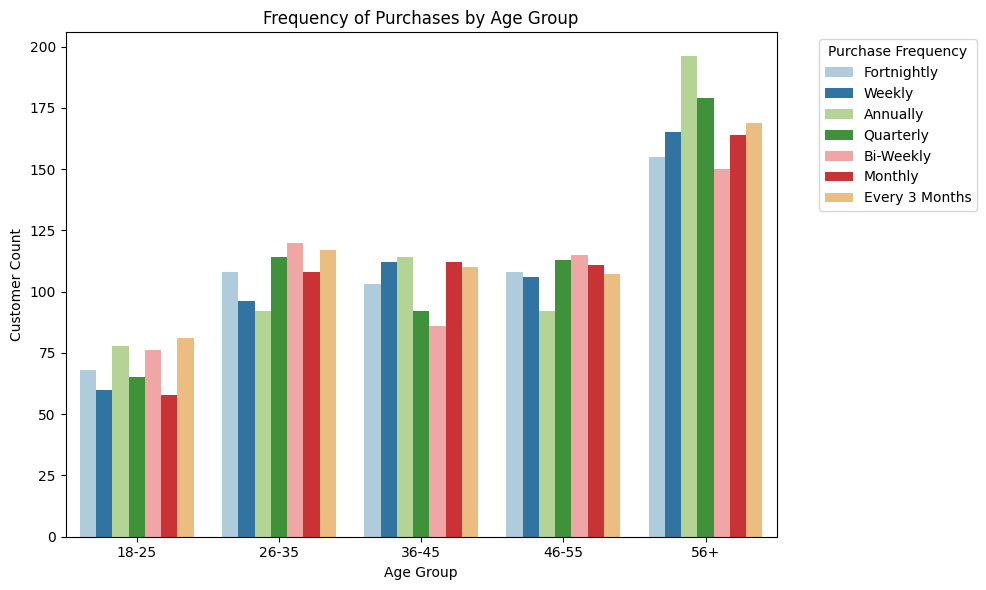

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data_cleaned, x='age_group', hue='frequency_of_purchases', palette='Paired')
plt.title('Frequency of Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("images/fraquency_of_purchases_by_age_group.png", bbox_inches='tight', dpi=300)
plt.show()

**Insights: Purchase Frequency by Age Group**

**1. Older Customers (56+) Are the Most Frequent Buyers**

They dominate across all frequency categories, especially:

1.    **Quarterly (179)**

2.     **Monthly (164)**

3.     **Weekly (165)**

This shows **strong long-term engagement and habit-based purchasing**, making them ideal for loyalty or subscription campaigns.

**2. 46–55 and 36–45 Age Groups Are Also Highly Engaged**

1.   **46–55 customers** have consistent numbers across all frequencies (esp. Fortnightly: 108, Weekly: 106), suggesting steady shopping habits.

2.  **36–45 customers** also shows high weekly and monthly engagement, indicating this group responds well to regular needs or promotions.

**3. Younger Customers (18–25) Buy Less Frequently**

They have the lowest counts in Monthly (58), Weekly (60), and Quarterly (65) segments.

This may reflect lower brand loyalty, fewer needs, or budget constraints.

**Consistency Increases with Age**

As age increases, so does the consistency of purchasing. This trend suggests older segments are more valuable long-term customers, even if individual purchases are small.

###**Categories by Gender**

In [29]:
all_categories = customer_data_cleaned['category'].unique()
filtered_df = customer_data_cleaned[customer_data_cleaned['category'].isin(all_categories)]


category_gender_counts = filtered_df.groupby(['gender', 'category']).size().unstack(fill_value=0)


print("Product Category Counts by Gender:")
print(category_gender_counts)

Product Category Counts by Gender:
category  Accessories  Clothing  Footwear  Outerwear
gender                                              
Female            392       556       199        101
Male              848      1181       400        223


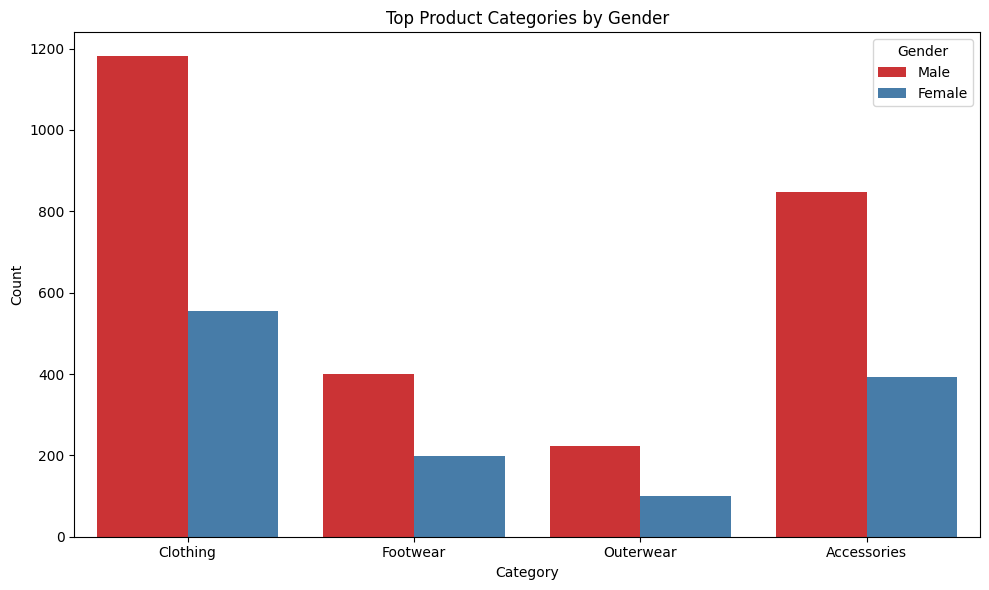

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data_cleaned[customer_data_cleaned['category'].isin(all_categories)], x='category', hue='gender', palette='Set1')
plt.title('Top Product Categories by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [34]:
category_gender_age = customer_data_cleaned.groupby(
    ['age_group', 'gender', 'category'], observed=True
).size().unstack(fill_value=0)

print("Purchase Counts by Category, Gender, and Age Group:")
print(category_gender_age)

Purchase Counts by Category, Gender, and Age Group:
category          Accessories  Clothing  Footwear  Outerwear
age_group gender                                            
18-25     Female           48        71        17         16
          Male             94       165        44         31
26-35     Female           73       107        42         19
          Male            175       233        73         33
36-45     Female           76       110        34         12
          Male            173       204        75         45
46-55     Female           73       112        47         22
          Male            148       213        92         45
56+       Female          122       156        59         32
          Male            258       366       116         69


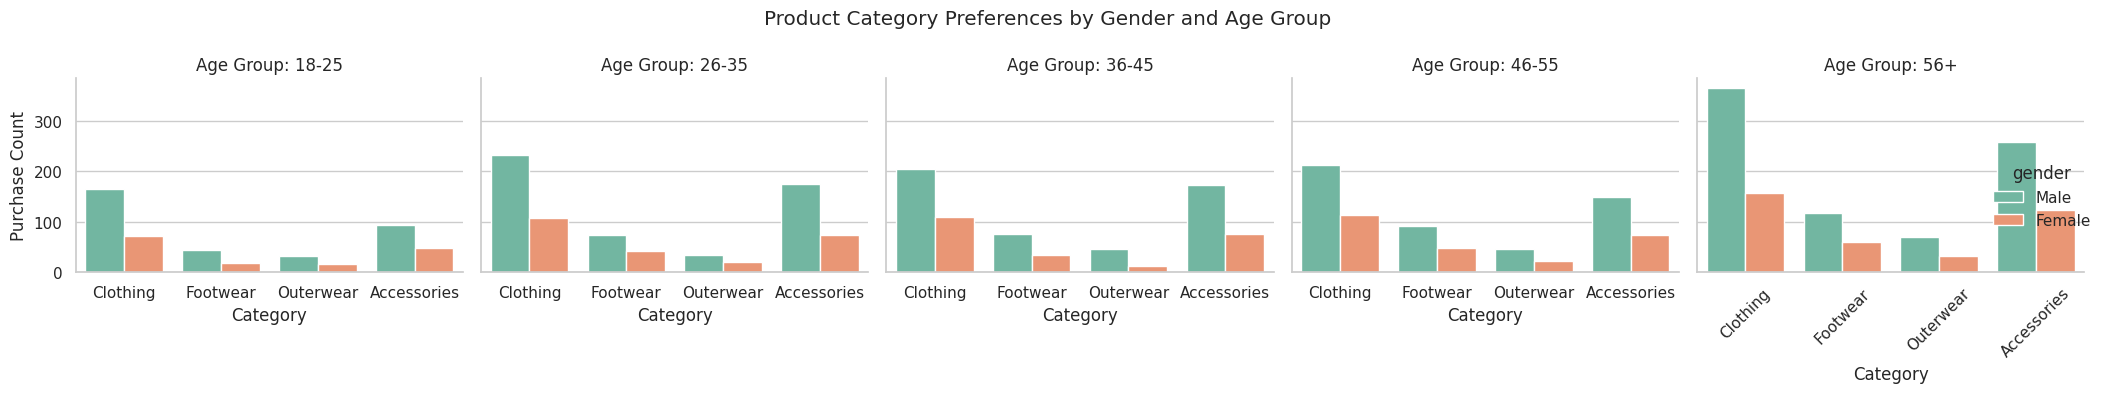

In [32]:
if 'age_group' not in customer_data_cleaned.columns:
    customer_data_cleaned['age_group'] = pd.cut(customer_data_cleaned['age'], bins=[18, 25, 35, 45, 55, 100],
                             labels=['18-25', '26-35', '36-45', '46-55', '56+'])

top_categories = customer_data_cleaned['category'].value_counts().index[:4]
filtered_df = customer_data_cleaned[customer_data_cleaned['category'].isin(top_categories)]

sns.set(style="whitegrid")
g = sns.catplot(data=filtered_df, x='category', hue='gender', col='age_group',
                kind='count', palette='Set2', height=4, aspect=1)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Product Category Preferences by Gender and Age Group")
g.set_axis_labels("Category", "Purchase Count")
g.set_titles("Age Group: {col_name}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####**Insights: Product Category Preferences by Gender and Age**
**1. Male Customers** Dominate Purchases Across All Categories
Males contribute nearly 3× as many purchases in Accessories, Clothing, Footwear, and Outerwear compared to females.

Especially strong in:

1.   **Clothing: 1,181 (vs. 556 for females)**

2.   **Accessories: 848 (vs. 392 for females)**

This suggests that male customers are highly engaged shoppers, particularly in wearable categories — possibly due to high repeat purchases or broader basket sizes.



**2. The 56+ Male** Segment is the Most Active Shopper Group
They lead in every product category:

1. **Clothing: 366**

2.  **Accessories: 258**

3.  **Footwear: 116**

4.  **Outerwear: 69**

This confirms earlier findings — the 56+ male segment is your most loyal and high-volume customer group, especially in clothing and accessories.

**3. Female Customer** Purchases Are Concentrated in Clothing
For all age groups, clothing is the top category for females.

Footwear and accessories are also relevant but much lower in count.

 Marketing to female segments may benefit from emphasizing seasonal clothing drops, with targeted promotions in key age brackets.

**4. Product Preferences Are Consistent Across Age**

In both genders, Clothing > Accessories > Footwear > Outerwear remains the consistent order of demand across all age groups.

This pattern indicates product hierarchy is stable across segments — valuable for inventory planning and promotion strategies.







#**Behavioral Segmentation**

**Discount Usage by Age Group**



In [51]:
discount_by_age = customer_data_cleaned.groupby(['age_group', 'discount_applied'], observed=True).size().unstack(fill_value=0)

print("Discount Usage by Age Group:")
print(discount_by_age)


Discount Usage by Age Group:
discount_applied   No  Yes
age_group                 
18-25             279  207
26-35             429  326
36-45             413  316
46-55             440  312
56+               662  516


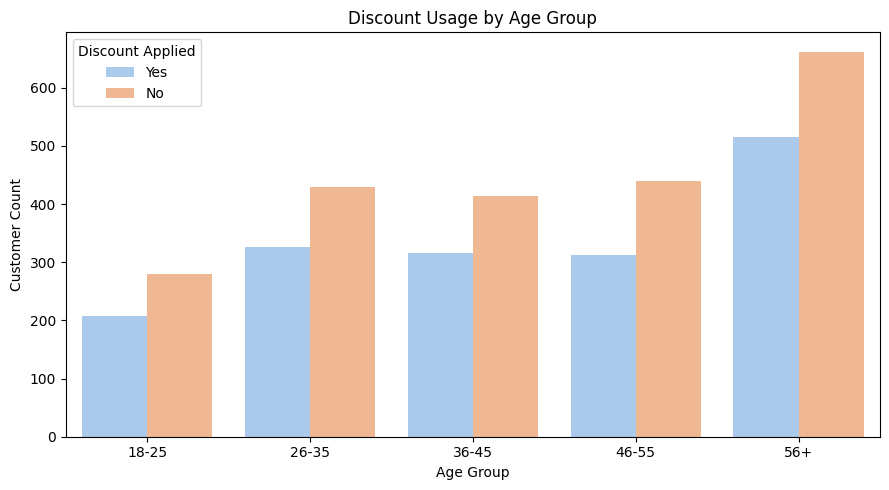

In [23]:
plt.figure(figsize=(9, 5))
sns.countplot(data=customer_data_cleaned, x='age_group', hue='discount_applied', palette='pastel')
plt.title('Discount Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.legend(title='Discount Applied')
plt.tight_layout()
plt.show()

**Insight: Discount Usage by Age Group**

**1. Older Customers (56+) Use Discounts Less Frequently.**
Out of 1,178 total purchases in this group, only 43.8% used a discount (516/1178).

This is the lowest discount usage rate among all age groups.
This suggests that older customers may be less price-sensitive or more loyal, purchasing regardless of promotional offers.

**2. Younger Age Groups (18–25) Are More Discount-Driven**

1. This group had 207 out of 486 purchases made with a discount — about 42.6%, close to the 56+ group in raw % but with a smaller overall purchase volume.

2. Still, discount use is more balanced, suggesting promotional offers remain important for conversion.

**3. Middle Age Groups (26–55) Rely Less on Discounts**

1. Across the 26–55 range, discount usage hovers around 40–42%, with the majority of purchases being full-price.

2. This group may respond better to value-driven marketing than just discounts.

####**Subscription Status by Gender**

In [9]:
subscription_by_gender = customer_data_cleaned.groupby(['gender', 'subscription_status']).size().unstack(fill_value=0)

print("Subscription Status by Gender:")
print(subscription_by_gender)


📬 Subscription Status by Gender:
subscription_status    No   Yes
gender                         
Female               1248     0
Male                 1599  1053


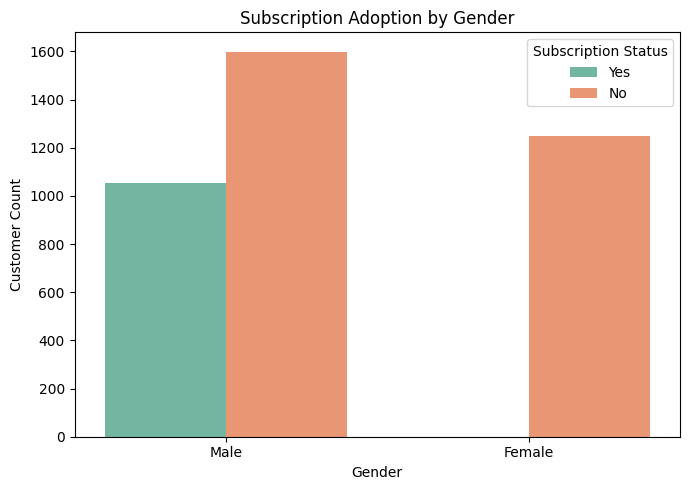

In [25]:
plt.figure(figsize=(7, 5))
sns.countplot(data=customer_data_cleaned, x='gender', hue='subscription_status', palette='Set2')
plt.title('Subscription Adoption by Gender')
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()


**Insight: Subscription Status by Gender**

**1․ All Female Customers Are Unsubscribed**

1․ 100% of female customers (1,248) have not subscribed.

2․  This may indicate a lack of targeted engagement strategies for the female segment or unmet needs that the subscription doesn't address.

**2․ All Subscription Engagement Comes from Male Customers**

1․  Out of 2,652 male customers, 1,053 are subscribed — that’s ~40% subscription rate.

2․ This shows that the subscription program is currently resonating only with male customers, likely due to content, incentives, or communication style.





In [20]:
subscription_revenue = customer_data_cleaned.groupby('subscription_status').agg(
    Purchase_Count=('purchase_amount_(usd)', 'count'),
    Total_Revenue=('purchase_amount_(usd)', 'sum'),
    Avg_Purchase_Amount=('purchase_amount_(usd)', 'mean')
)
print("Revenue Metrics by Subscription Status:")
print(subscription_revenue)


Revenue Metrics by Subscription Status:
                     Purchase_Count  Total_Revenue  Avg_Purchase_Amount
subscription_status                                                    
No                             2847         170436            59.865121
Yes                            1053          62645            59.491928


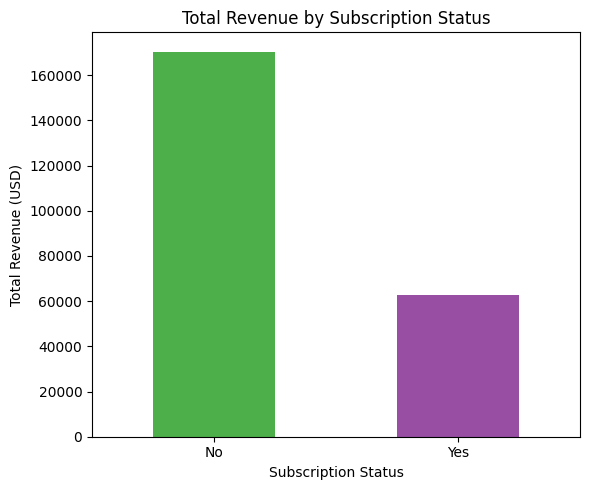

In [19]:
revenue_by_subscription = customer_data_cleaned.groupby('subscription_status')['purchase_amount_(usd)'].sum()
revenue_by_subscription.plot(kind='bar', color=['#4daf4a', '#984ea3'], figsize=(6, 5))
plt.title("Total Revenue by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Insight: Subscription Status vs. Total Revenue**

**1. Non-Subscribed Customers Generate the Majority of Revenue**

1.  With 2,847 purchases, unsubscribed customers contribute $170,436, accounting for over 73% of total revenue.

2.  This dominance is primarily due to the larger number of unsubscribed users, not higher spending per order.

**2. Average Purchase Amount Is Nearly Identical**

1.  Subscribed customers: $59.49

2.  Unsubscribed customers: $59.87

3.  This minimal difference indicates that subscription does not influence how much customers spend per purchase.


####**Impact of Discounts on Revenue and Customer Ratings**


In [23]:
discount_impact = customer_data_cleaned.groupby('discount_applied').agg(
    Purchase_Count=('purchase_amount_(usd)', 'count'),
    Total_Revenue=('purchase_amount_(usd)', 'sum'),
    Avg_Purchase_Amount=('purchase_amount_(usd)', 'mean'),
    Avg_Review_Rating=('review_rating', 'mean')
)

print("Discount Impact Summary:")
print(discount_impact)

Discount Impact Summary:
                  Purchase_Count  Total_Revenue  Avg_Purchase_Amount  \
discount_applied                                                       
No                          2223         133670            60.130454   
Yes                         1677          99411            59.279070   

                  Avg_Review_Rating  
discount_applied                     
No                         3.757715  
Yes                        3.739654  


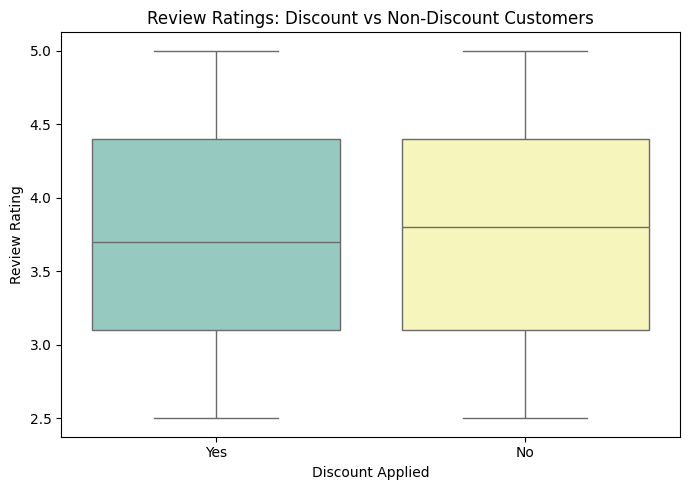

In [28]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=customer_data_cleaned, x='discount_applied',hue="discount_applied", y='review_rating', palette='Set3')
plt.title('Review Ratings: Discount vs Non-Discount Customers')
plt.xlabel('Discount Applied')
plt.ylabel('Review Rating')
plt.tight_layout()
plt.show()

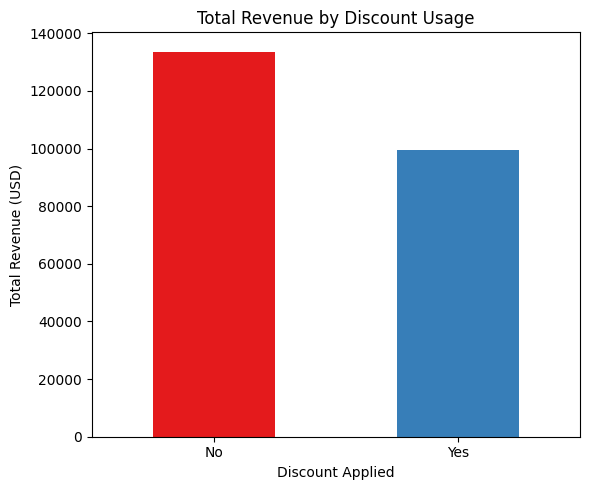

In [58]:
revenue_by_discount = customer_data_cleaned.groupby('discount_applied')['purchase_amount_(usd)'].sum()

revenue_by_discount.plot(kind='bar', color=['#e41a1c', '#377eb8'], figsize=(6, 5))

plt.title("Total Revenue by Discount Usage")
plt.xlabel("Discount Applied")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("images/total_revenue_by_discount_usage.png", bbox_inches='tight', dpi=300)
plt.show()


**1. No-Discount Customers Contribute More to Revenue**

1.  With 2223 purchases, customers who didn't use a discount generated $133,670, accounting for a larger share of total revenue.

2.  Their average purchase amount ($60.13) is slightly higher than those who used discounts.

**2. Discount Users Buy More Frequently but Spend Less per Transaction**

1.  Although fewer in total revenue, discount users made 1677 purchases, showing strong engagement.

2.  However, their average order value drops to $59.28, indicating price sensitivity.

**3. Customer Satisfaction Is Slightly Lower with Discounts**

1.  The average review rating from discount users is 3.74, slightly below the 3.76 from non-discount customers.

2.  This suggests that discounted experiences might not be perceived as higher quality — potentially due to expectations or product/service limitations during promotions.



##**Final Report: Customer Purchase Behavior Analysis**

**1. Executive Summary**

This project analyzes customer purchase behavior using a dataset of 3,900 records, each containing demographic, transactional, and behavioral attributes. The goal was to extract actionable insights on purchasing patterns, customer segments, product preferences, and the influence of marketing drivers like discounts and subscriptions.

**Key tools used: Python (Pandas, Seaborn, Matplotlib)** for cleaning, analysis, and visualization.

**2. Key Findings**

**Customer Segmentation**

1.  Age & Gender: The largest and most consistent revenue came from male customers aged 56+, driven by high purchase frequency rather than large order size.

2.  Age group 18–25 and 26–35 also showed strong engagement, especially with clothing products.

**Product Preferences**
1.  Clothing is the most purchased and most profitable category, followed by Accessories and Footwear.

2.  Top individual products include blouses, pants, jewelry, and shirts, with steady demand across all age groups.

**Discount Impact**

1.  Discount users made fewer total purchases and had slightly lower average order values.

2.  Non-discount users generated more total revenue and showed slightly higher review ratings, suggesting they may be more loyal or less price-sensitive.

**Subscription Insights**
1.  100% of female customers are unsubscribed, while ~40% of males are subscribed.

2.  Subscription does not significantly affect average purchase size

**Review Rating Trends**
1.  Average review ratings are consistent across gender and age, but slightly lower for customers using discounts.

2.  No strong correlation between high-value purchases and higher review scores.

**Behavioral Trends**
1. Most customers purchase quarterly or every 3 months.

2.  Older customers (56+) purchase more frequently overall, reinforcing their role as key repeat buyers.

**3. Business Recommendations**
1.  Target male customers 56+ with loyalty programs, not deep discounts — they already drive volume.

2.  Improve subscription offerings for female customers through targeted outreach and better incentives.

3.  Focus discount campaigns on younger segments (18–35), who are more responsive to price promotions.

4.  Prioritize Clothing and Accessories in marketing, inventory, and personalization efforts.